In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
import json
from PIL import Image
import random

In [4]:
import tensorflow as tf
import numpy as np
import pickle
import matplotlib.pyplot as plt

/home/adam/.pyenv/versions/3.6.3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


# CIFAR

In [ ]:
cifar_id2name = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'}

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

def get_random_sample_cifar(dataset, cifar_id2name):
    random_id = np.random.randint(0, dataset[b'data'].shape[0], 1)[0]
    img = dataset[b'data'][random_id].reshape((32, 32, 3), order='F')
    img = np.swapaxes(img, 0, 1)
    return img, dataset[b'labels'][random_id], cifar_id2name[dataset[b'labels'][random_id]]
    

In [ ]:
dataset_cifar = unpickle('../data/cifar-10-batches-py/data_batch_1')

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplots_adjust(wspace=.5, hspace=.5)
idx = 1
for row in range(5):
    for col in range(5):
        img, _, name = get_random_sample_cifar(dataset_cifar, cifar_id2name)
        ax = plt.subplot(5, 5, idx)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.set_title(name)
        img = ax.imshow(img)
        idx += 1


# MSCOCO
http://images.cocodataset.org/zips/val2017.zip  
http://images.cocodataset.org/annotations/annotations_trainval2017.zip

In [6]:
dataset_coco = json.load(open('data/mscoco/annotations/instances_val2017.json', 'r'))

In [7]:
im_id2im_path = {}
for item in dataset_coco['images']:
    im_id2im_path[item['id']] = item['file_name']

In [9]:
im_id2coco_id = {}
for item in dataset_coco['annotations']:
    im_id2coco_id[item['image_id']] = item['category_id']

In [11]:
coco_id2name = {}
for item in dataset_coco['categories']:
    coco_id2name[item['id']] = item['name']

In [13]:
def get_random_sample_coco(im_id2im_path, im_id2coco_id, coco_id2name):
    image_id = random.sample(list(im_id2coco_id.keys()), 1)[0]
    return Image.open(open('./data/mscoco/val2017/'+im_id2im_path[image_id], 'rb')).resize((64,64)), im_id2coco_id[image_id], coco_id2name[im_id2coco_id[image_id]] 

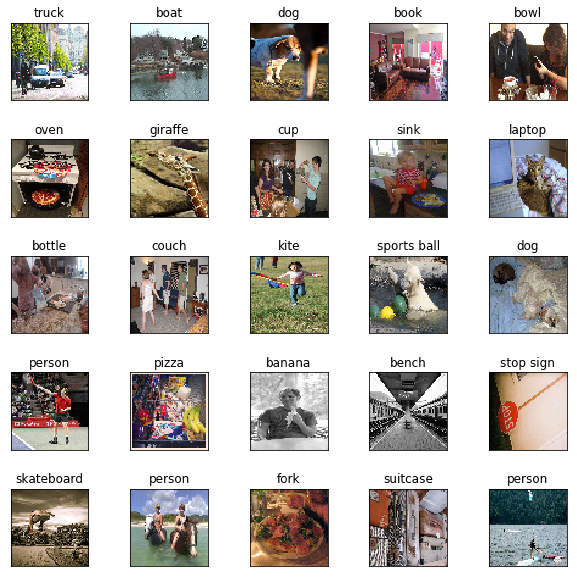

In [21]:
plt.figure(figsize=(10, 10))
plt.subplots_adjust(wspace=.5, hspace=.5)
idx = 1
for row in range(5):
    for col in range(5):
        img, _, name = get_random_sample_coco(im_id2im_path, im_id2coco_id, coco_id2name)
        ax = plt.subplot(5, 5, idx)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        ax.set_title(name)
        img = ax.imshow(img)
        
        idx += 1